# New York City TLC Project: Exploratory data analysis

We will proceed with exploratory data analysis (EDA) after our preliminary data understanding.  

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Our mission is to continue the previous investigation and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*The process of EDA will be split into 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

<br/> 

# **Visualize a story in Python and Tableau**

# **PACE stages** 

As usual, we will use the PACE (Plan, Analyze, Construct, and Execute) workflow to carry out the analysis. 

## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. Identify any outliers: 


a) What methods are best for identifying outliers?
* Use numpy functions to investigate the mean() and median() of the data and understand range of data values
* Use a boxplot to visualize the distribution of the data
* Use histograms to visualize the distribution of the data

b) How do you make the decision to keep or exclude outliers from any future models?
* There are three main options for dealing with outliers: keeping them as they are, deleting them, or reassigning them. 
* Whether you keep outliers as they are, delete them, or reassign values is a decision that you make taking into account the nature of the outlying data and the assumptions of the model you are building. To help you make the decision, you can start with these general guidelines:
* Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then you are more likely to decide to delete outliers. Of the three choices, you’ll use this one the least.
* Reassign them: If the dataset is small and/or the data will be used for modeling or machine learning, you are more likely to choose a path of deriving new values to replace the outlier values.
* Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or for a dataset you are preparing for a model that is resistant to outliers, it is most likely that you are going to leave them in.




### Task 1. Imports, links, and loading

In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [51]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

## PACE: Analyze 

### Task 2a. Data exploration and cleaning

We proceed with understanding the data.

In [3]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [4]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [7]:
df.shape

(22699, 18)

### Task 2b. Assess whether dimensions and measures are correct

On the data source page in Tableau, double check the data types for the applicable columns you selected on the previous step. Pay close attention to the dimensions and measures to assure they are correct. 

In Python, consider the data types of the columns. *Consider:* Do they make sense? 

### Task 2c. Select visualization type(s)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


After observing, a bar chart, box plot and scatter plot will be most helpful in your understanding of this data.

A box plot will be helpful to determine outliers and where the bulk of the data points reside in terms of trip_distance, duration, and total_amount

A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables, such as trip_distance and total_amount

A bar chart will help determine average number of trips per month, weekday, weekend, etc.

## PACE: Construct 

### Task 3. Data visualization

After assessed the data, we have decided on which data variables are most applicable. We will begin the visualization.


### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [95]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

**trip distance**

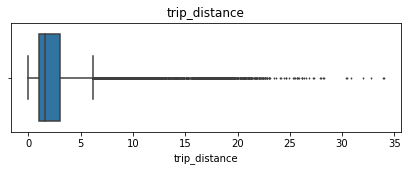

In [26]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1);

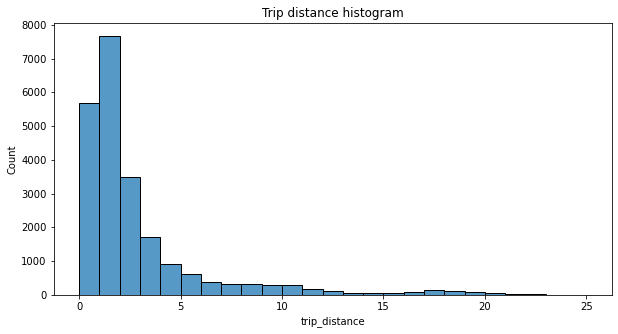

In [27]:
# Create histogram of trip_distance
plt.figure(figsize=(10,5))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

Findings: The majority of trips were journeys of less than two miles. The number of trips falls away steeply as the distance traveled increases beyond two miles.

**total amount**

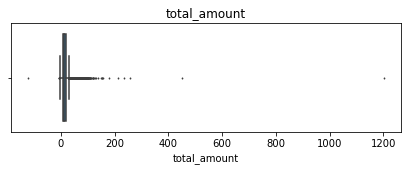

In [32]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
plt.title('total_amount')
sns.boxplot(data=None, x=df['total_amount'], fliersize=1);

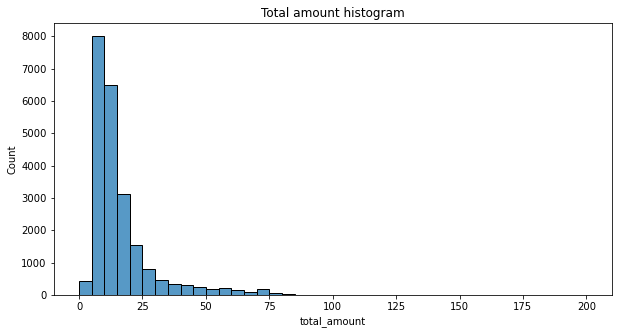

In [34]:
# Create histogram of total_amount
plt.figure(figsize=(10,5))
sns.histplot(df['total_amount'], bins=range(0,201,5))
plt.title('Total amount histogram');

Findings: The total cost of each trip also has a distribution that skews right, with most costs falling in the $5-15 range.

**tip amount**

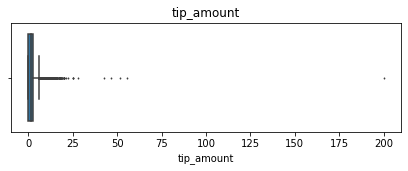

In [37]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
plt.title('tip_amount')
sns.boxplot(data=None, x=df['tip_amount'], fliersize=1);

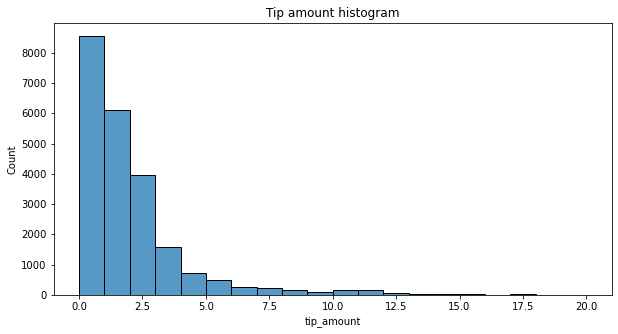

In [39]:
# Create histogram of tip_amount
plt.figure(figsize=(10,5))
sns.histplot(df['tip_amount'], bins=range(0,21,1))
plt.title('Tip amount histogram');

Findings: The distribution for tip amount is right-skewed, with nearly all the tips in the $0-3 range.

**tip_amount by vendor**

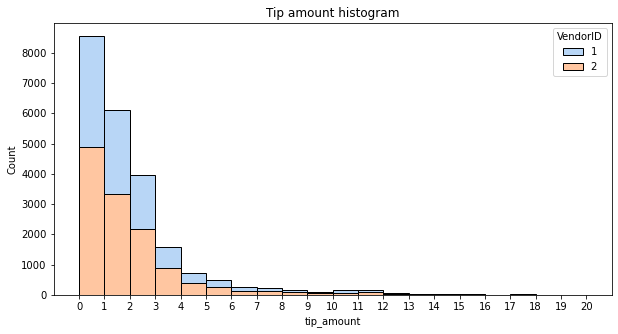

In [7]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(10,5))
ax = sns.histplot(data=df, x ='tip_amount', bins=range(0,21,1),
            hue='VendorID',
            multiple='stack',
            palette='pastel')

ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))

plt.title('Tip amount histogram');


Findings: Separating the tip amount by vendor reveals that there are no noticeable aberrations in the distribution of tips between the two vendors in the dataset. Vendor two has a slightly higher share of the rides, and this proportion is approximately maintained for all tip amounts.

Next, we will zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

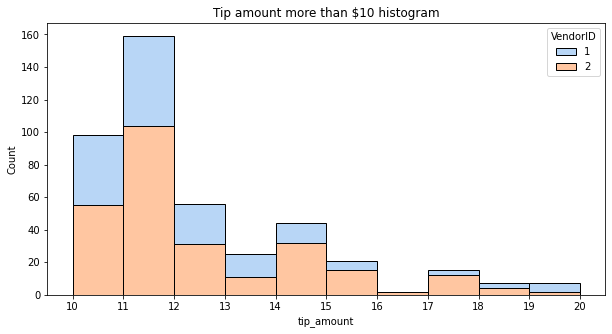

In [9]:
# Create histogram of tip_amount by vendor for tips > $10 
df_tip = df[df['tip_amount'] > 10]

plt.figure(figsize=(10,5))
ax = sns.histplot(data=df_tip, x ='tip_amount', bins=range(10,21,1),
            hue='VendorID',
            multiple='stack',
            palette='pastel')

ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))

plt.title('Tip amount more than $10 histogram');


Findings: The proportions are maintained even at these higher tip amounts, with the exception being at highest extremity, but this is not noteworthy due to the low sample size at these tip amounts.

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [12]:
df['passenger_count'].value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

Findings: Nearly two thirds of the rides were single occupancy, though there were still nearly 700 rides with as many as six passengers. Also, there are 33 rides with an occupancy count of zero, which doesn't make sense. These would likely be dropped unless a reasonable explanation can be found for them.

In [17]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df[['tip_amount']].groupby(df['passenger_count']).mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


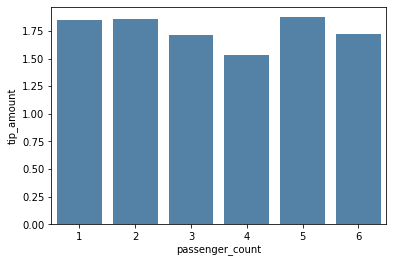

In [29]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)

sns.barplot(x = data.index , y = data['tip_amount'] , color='steelblue');

Findings: Mean tip amount varies very little by passenger count. Although it does drop noticeably for four-passenger rides, it's expected that there would be a higher degree of fluctuation because rides with four passengers were the least plentiful in the dataset (aside from rides with zero passengers).

**Create month and day columns**

In [18]:
# Create a month column
df['Month'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.month_name()

# Create a day column
df['Day'] = pd.to_datetime(df['tpep_dropoff_datetime']).dt.day_name()

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [21]:
# Get total number of rides for each month
monthly_rides = df['Month'].value_counts()
monthly_rides

March        2049
October      2026
April        2019
May          2012
January      1996
June         1963
December     1863
November     1844
February     1770
September    1734
August       1725
July         1698
Name: Month, dtype: int64

Reorder the results to put the months in calendar order.

In [24]:
# Reorder the monthly ride list so months go in order
month_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_index)
monthly_rides

January      1996
February     1770
March        2049
April        2019
May          2012
June         1963
July         1698
August       1725
September    1734
October      2026
November     1844
December     1863
Name: Month, dtype: int64

In [25]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

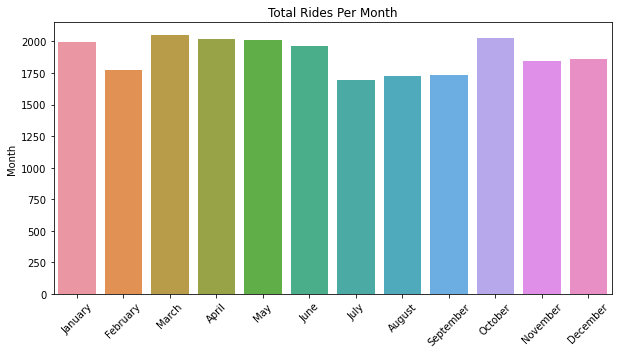

In [31]:
# Create a bar plot of total rides per month
plt.figure(figsize=(10,5))
plt.title('Total Rides Per Month')
sns.barplot(x = monthly_rides.index, y = monthly_rides)
plt.xticks(rotation=45);

Findings: Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [34]:
# Repeat the above process, this time for rides by day
week_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_rides = df['Day'].value_counts().reindex(index=week_index)
weekly_rides

Monday       2940
Tuesday      3192
Wednesday    3380
Thursday     3392
Friday       3417
Saturday     3352
Sunday       3026
Name: Day, dtype: int64

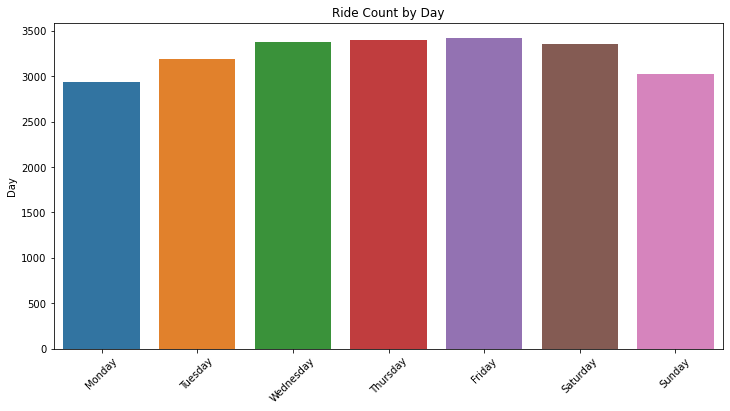

In [36]:
# Create bar plot for ride count by day
plt.figure(figsize=(12,6))
sns.barplot(x = weekly_rides.index, y = weekly_rides )
plt.xticks(rotation=45)
plt.title('Ride Count by Day');

Findings: Suprisingly, Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [47]:
# Repeat the process, this time for total revenue by day
day_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_revenue = df['total_amount'].groupby(df['Day']).sum().reindex(index=day_index)
day_revenue

Day
Monday       49825.91
Tuesday      52375.77
Wednesday    55297.77
Thursday     56736.27
Friday       56171.27
Saturday     50956.20
Sunday       48868.90
Name: total_amount, dtype: float64

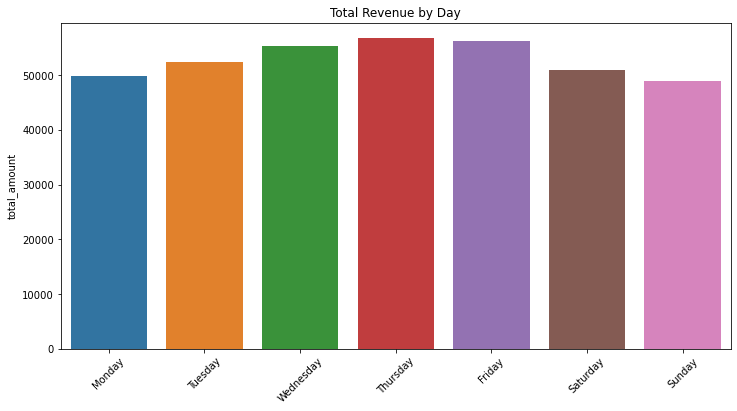

In [48]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,6))
sns.barplot(x = day_index, y = day_revenue )
plt.xticks(rotation=45)
plt.title('Total Revenue by Day');

Findings: Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was ~$6,000 less than Thursday's—more than a 10% drop.

**Plot total revenue by month**

In [49]:
# Repeat the process, this time for total revenue by month
month_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

month_revenue = df['total_amount'].groupby(df['Month']).sum().reindex(index=month_index)
month_revenue

Month
January      31721.95
February     28951.19
March        33085.89
April        32012.54
May          33815.02
June         32914.48
July         26626.68
August       27770.12
September    28206.38
October      33045.67
November     30820.60
December     31261.57
Name: total_amount, dtype: float64

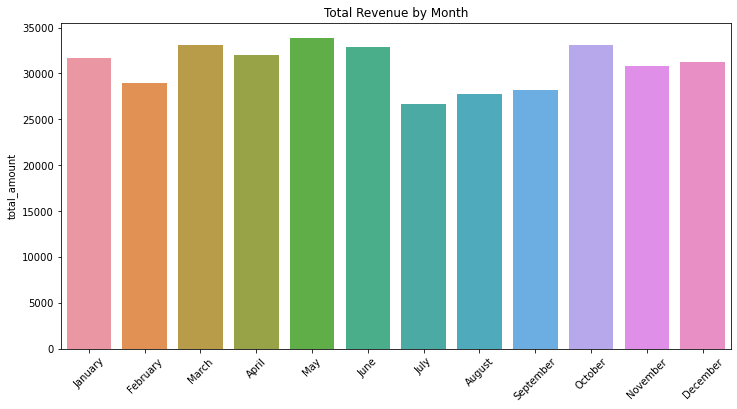

In [50]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,6))
sns.barplot(x = month_index, y = month_revenue )
plt.xticks(rotation=45)
plt.title('Total Revenue by Month');

Findings: Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.

#### Scatter plot

Scatterplot was created in Tableau Public, which can be easier to manipulate and present. The scatterplot showing the relationship between total_amount and trip_distance. Findings on those two variables were presented on viz.

Tableau link : https://public.tableau.com/app/profile/fan.wei.foong/viz/ScatterplotVisualizationforNewYokCityTLSbeforeEDA/Dashboard1

**Plot mean trip distance by drop-off location**

In [59]:
# Get number of unique drop-off location IDs
sum_unique = df['DOLocationID'].nunique()
sum_unique

216

In [72]:
# Calculate the mean trip distance for each drop-off location
mean_trip_distance = df[['trip_distance']].groupby(df['DOLocationID']).mean()

# Sort the results in descending order by mean trip distance
mean_trip_distance = mean_trip_distance.sort_values(by='trip_distance', ascending=True)
mean_trip_distance

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


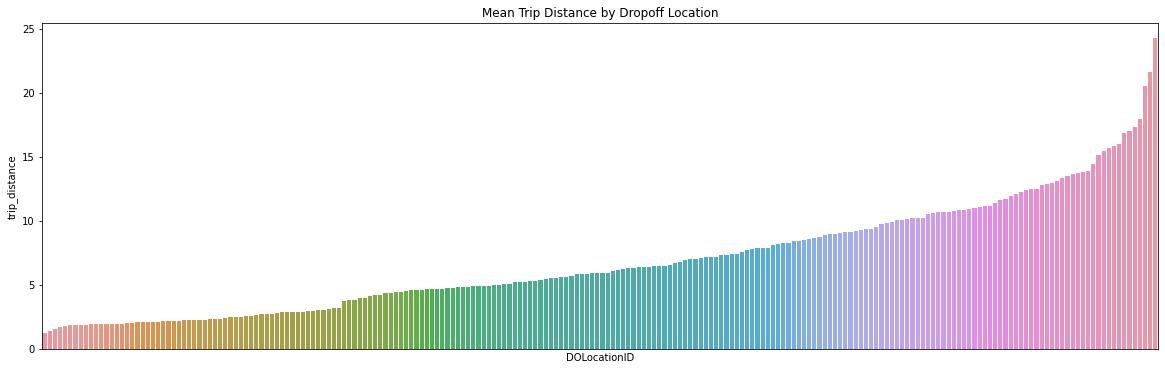

In [88]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(20,6))
sns.barplot(x=mean_trip_distance.index ,y=mean_trip_distance['trip_distance'], order=mean_trip_distance.index)
plt.title('Mean Trip Distance by Dropoff Location')
plt.xticks([]);


Findings: This plot presents a characteristic curve related to the cumulative density function of a normal distribution. In other words, it indicates that the drop-off points are relatively evenly distributed over the terrain. This is good to know, because geographic coordinates were not included in this dataset, so there was no obvious way to test for the distibution of locations.

To confirm this conclusion, we will conduct the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

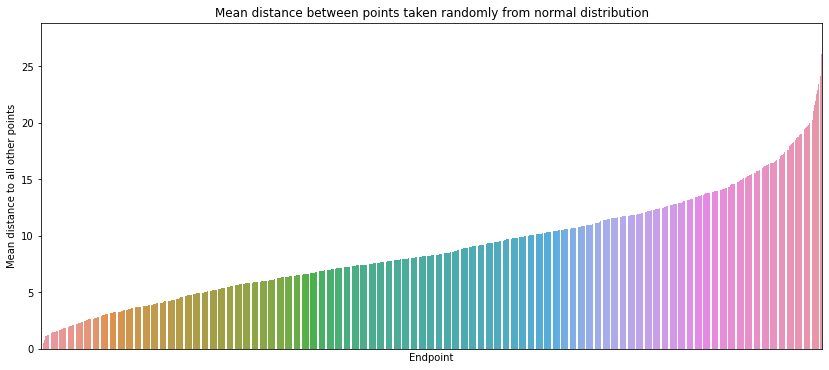

In [89]:
#1. Generate random points on a 2D plane from a normal distribution
#values = np.random.normal(Mean, Standard_deviation, size)
test = np.round(np.random.normal(10, 5, (3000, 2)), 1)
midway = int(len(test)/2)  # Calculate midpoint of the array of coordinates
start = test[:midway]      # Isolate first half of array ("pick-up locations")
end = test[midway:]        # Isolate second half of array ("drop-off locations")

# 2. Calculate Euclidean distances between points in first half and second half of array
distances = (start - end)**2
distances = distances.sum(axis=-1)
distances = np.sqrt(distances)

# 3. Group the coordinates by "drop-off location", compute mean distance
test_df = pd.DataFrame({'start': [tuple(x) for x in start.tolist()],
                   'end': [tuple(x) for x in end.tolist()],
                   'distance': distances})
data = test_df[['end', 'distance']].groupby('end').mean()
data = data.sort_values(by='distance')

# 4. Plot the mean distance between each endpoint ("drop-off location") and all points it connected to
plt.figure(figsize=(14,6))
ax = sns.barplot(x=data.index,
                 y=data['distance'],
                 order=data.index)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_xlabel('Endpoint')
ax.set_ylabel('Mean distance to all other points')
ax.set_title('Mean distance between points taken randomly from normal distribution');

Findings: The curve described by this graph is nearly identical to that of the mean distance traveled by each taxi ride to each drop-off location. This reveals that the drop-off locations in the taxi dataset are evenly distributed geographically. Note, however, that this does not mean that there was an even distrubtion of rides to each drop-off point. Examine this next.

**Histogram of rides by drop-off location**

First, check to whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

In [ ]:
# Check if all drop-off locations are consecutively numbered
df['DOLocationID'].max() - len(set(df['DOLocationID'])) 

Findings: There are 49 numbers that do not represent a drop-off location.

To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

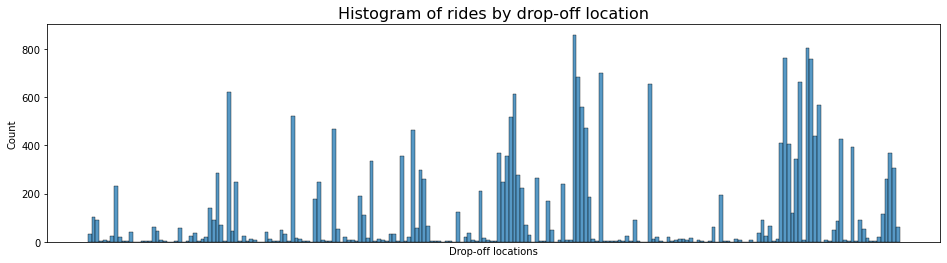

In [90]:
plt.figure(figsize=(16,4))
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df['DOLocationID'].sort_values()
# Convert to string
sorted_dropoffs = sorted_dropoffs.astype('str')
# Plot
sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations')
plt.title('Histogram of rides by drop-off location', fontsize=16);

Findings: Notice that out of the 200+ drop-off locations, a disproportionate number of locations receive the majority of the traffic, while all the rest get relatively few trips. It's likely that these high-traffic locations are near popular tourist attractions like the iconic buildings, airports, and train and bus terminals. However, it would be helpful to know the location that each ID corresponds with. Unfortunately, we don't have the information.

## PACE: Execute 

### Task 4a. Results and evaluation

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue? 

Put ourself in client's perspective, what would they want to know? 

1.We noticed that the highest distribution of trip distances are below 5 miles, but there are outliers all the way out to 35 miles. There are no missing values.

2.There are several trips that have a trip distance of "0.0." What might those trips be? Will they impact our model?

3.Assuming client would likely want to know that the data includes dropoff and pickup times, we can use that information to derive a trip duration for each line of data. This would likely be something that will help the client with their model.


In [97]:
df['trip_duration'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [98]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,24870114,2,2017-03-25,2017-03-25,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days
1,35634249,1,2017-04-11,2017-04-11,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days
2,106203690,1,2017-12-15,2017-12-15,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days
3,38942136,2,2017-05-07,2017-05-07,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days
4,30841670,2,2017-04-15,2017-04-15,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days
5,23345809,2,2017-03-25,2017-03-25,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0 days
6,37660487,2,2017-05-03,2017-05-03,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,0 days
7,69059411,2,2017-08-15,2017-08-15,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,0 days
8,8433159,2,2017-02-04,2017-02-04,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,0 days
9,95294817,1,2017-11-10,2017-11-10,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,0 days


### Task 4b. Conclusion

Based on the above findings, we can conclude that EDA and visualization are both important keys for data discovery.

EDA is important because it helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling.

Visualizations helped me understand that this dataset has some outliers that we will need to make decisions on prior to designing a model.

We will proceed with executive summary for this section.